In [15]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [16]:
df=pd.read_csv('/Users/aswithsama/Desktop/cleaned_ACS_data.csv')

In [17]:
df.head()

,County,Democratic,Liberation,Republic,Male,Female,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,...,Mexican,Puerto Rican,Cuban,Other Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone
0,Aleutians East Borough,76,12,243,"2,102","1,305",142,270,515,633,...,284,19,4,98,536,172,"1,248",676,10,15
1,Aleutians West Census Area,254,11,287,"3,484","1,735",334,319,885,831,...,581,2,140,79,"1,222",201,426,"2,114",183,0
2,Anchorage Municipality,49028,1152,35241,"149,144","141,530","18,328","21,652","48,906","40,272",...,"13,755","4,739","1,309","8,359","160,574","14,793","20,464","27,795","8,376","1,928"
3,Bethel Census Area,3074,29,573,"9,909","8,629","1,576","1,372","2,814","2,020",...,164,5,0,230,"1,632",214,"15,275",260,40,0
4,Bristol Bay Borough,145,4,149,489,365,40,45,196,97,...,30,37,0,7,379,3,257,48,17,11


In [18]:
df.columns



Index(['County', 'Democratic', 'Liberation', 'Republic', 'Male', 'Female',
       '15 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years',
       '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years',
       '75 to 84 years', '85 years and over', 'Cherokee tribal grouping',
       'Chippewa tribal grouping', 'Navajo tribal grouping',
       'Sioux tribal grouping', 'Asian Indian', 'Chinese', 'Filipino',
       'Japanese', 'Korean', 'Vietnamese', 'Other Asian',
       'Native Hawaiian and Other Pacific Islander', 'Chamorro',
       'Native Hawaiian', 'Samoan',
       'Other Native Hawaiian and Other Pacific Islander', 'Some Other Race',
       'White and Black or African American',
       'White and American Indian and Alaska Native', 'White and Asian',
       'White and Some Other Race',
       'Black or African American and American Indian and Alaska Native',
       'Black or African American and Some Other Race', 'Mexican',
       'Puerto Rican', 'Cuba

In [19]:
df.head()

,County,Democratic,Liberation,Republic,Male,Female,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,...,Mexican,Puerto Rican,Cuban,Other Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone
0,Aleutians East Borough,76,12,243,"2,102","1,305",142,270,515,633,...,284,19,4,98,536,172,"1,248",676,10,15
1,Aleutians West Census Area,254,11,287,"3,484","1,735",334,319,885,831,...,581,2,140,79,"1,222",201,426,"2,114",183,0
2,Anchorage Municipality,49028,1152,35241,"149,144","141,530","18,328","21,652","48,906","40,272",...,"13,755","4,739","1,309","8,359","160,574","14,793","20,464","27,795","8,376","1,928"
3,Bethel Census Area,3074,29,573,"9,909","8,629","1,576","1,372","2,814","2,020",...,164,5,0,230,"1,632",214,"15,275",260,40,0
4,Bristol Bay Borough,145,4,149,489,365,40,45,196,97,...,30,37,0,7,379,3,257,48,17,11


In [20]:
df.columns

Index(['County', 'Democratic', 'Liberation', 'Republic', 'Male', 'Female',
       '15 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years',
       '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years',
       '75 to 84 years', '85 years and over', 'Cherokee tribal grouping',
       'Chippewa tribal grouping', 'Navajo tribal grouping',
       'Sioux tribal grouping', 'Asian Indian', 'Chinese', 'Filipino',
       'Japanese', 'Korean', 'Vietnamese', 'Other Asian',
       'Native Hawaiian and Other Pacific Islander', 'Chamorro',
       'Native Hawaiian', 'Samoan',
       'Other Native Hawaiian and Other Pacific Islander', 'Some Other Race',
       'White and Black or African American',
       'White and American Indian and Alaska Native', 'White and Asian',
       'White and Some Other Race',
       'Black or African American and American Indian and Alaska Native',
       'Black or African American and Some Other Race', 'Mexican',
       'Puerto Rican', 'Cuba

In [21]:
# Correctly replace commas with an empty string and convert to integers
df[df.columns[1:]] = df[df.columns[1:]].replace({',': ""}, regex=True).astype(int)


## AGE GROUP VS PARTY WON

7 15


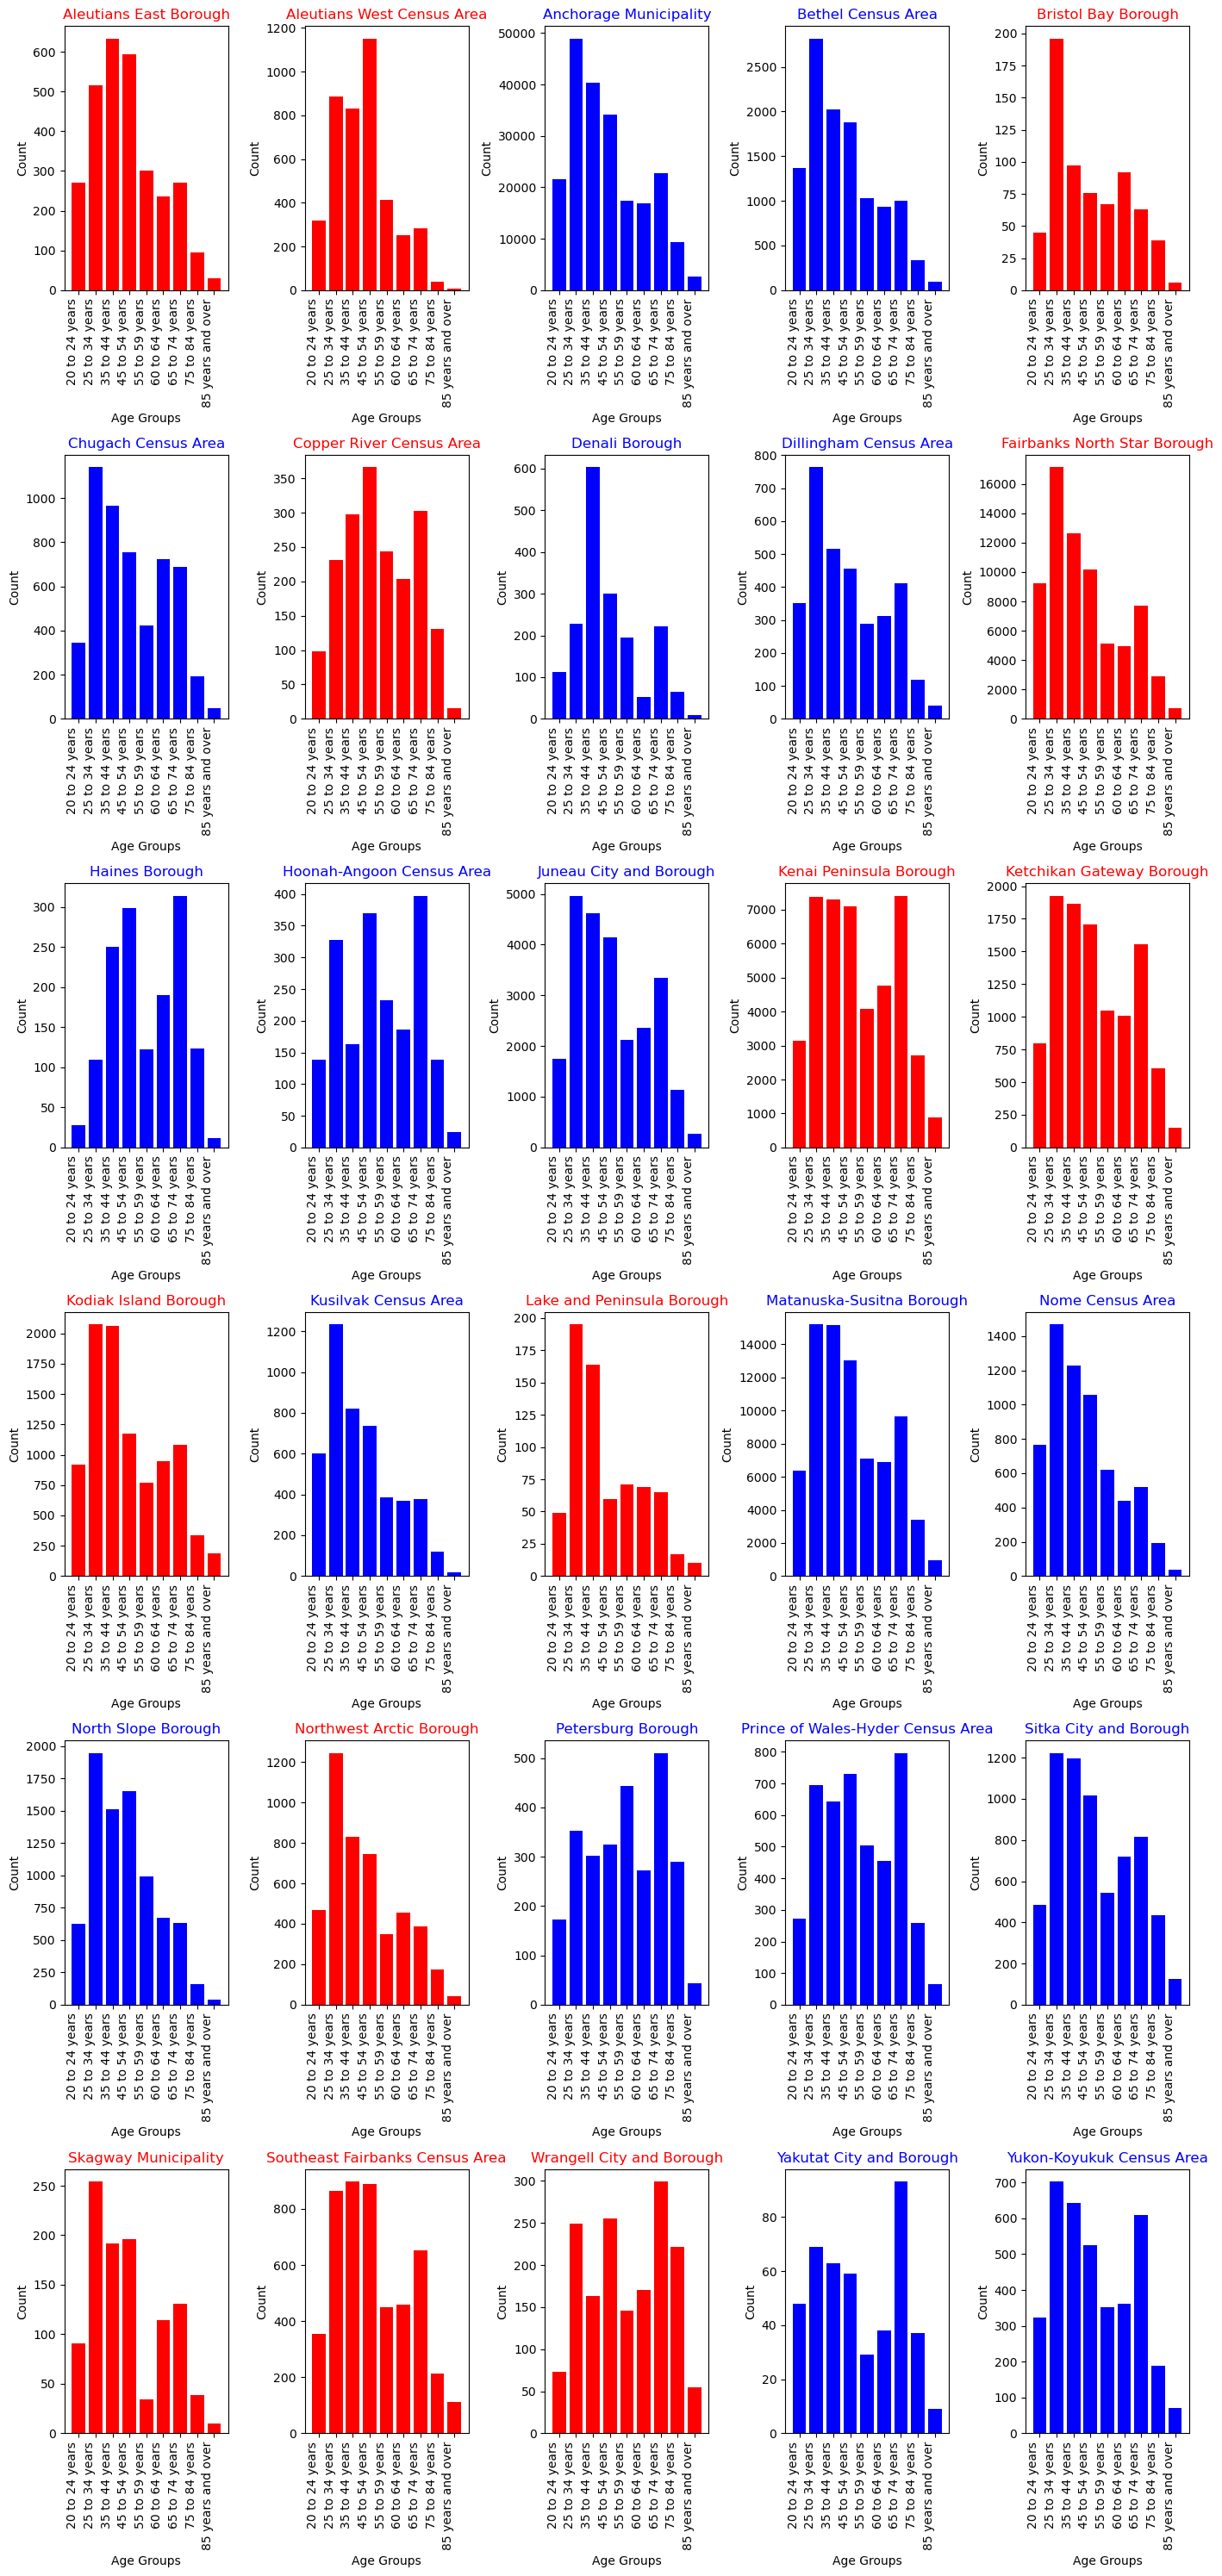

In [22]:
import matplotlib.pyplot as plt
import pandas as pd


columns1=list(df.columns)
starting_age_index=columns1.index('20 to 24 years')
ending_age_index=columns1.index('85 years and over')
print(starting_age_index,ending_age_index)
# Get the dominant party for each borough
dominant_party = list(df[['Democratic', 'Liberation', 'Republic']].idxmax(axis=1))


# Define party colors
party_colors = {
    'Democratic': 'blue',
    'Liberation': 'green',
    'Republic': 'red'
}

# Plot bar graphs in a grid
age_columns = df.iloc[:, starting_age_index:ending_age_index + 1].columns
num_boroughs = len(df)
cols = 5  # Number of columns in the grid
rows = 6  # Compute rows needed

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 5))
axes = axes.flatten()  # Flatten axes array for easy indexing

for i, row in df.iterrows():
    borough = row['County']
    age_counts = row[starting_age_index:ending_age_index + 1]
    #print(age_counts)
    dominant_party1 = dominant_party[i]
    color_party = party_colors[dominant_party1]

    # Plot on the corresponding subplot
    ax = axes[i]
    ax.bar(age_columns, age_counts, color=color_party)
    ax.set_xticklabels(age_columns, rotation=90, ha='right')
    ax.set_title(f'{borough}', color=color_party, fontsize=12)
    ax.set_xlabel('Age Groups')
    ax.set_ylabel('Count')

# Remove unused subplots if boroughs don't fill the grid
for j in range(num_boroughs, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

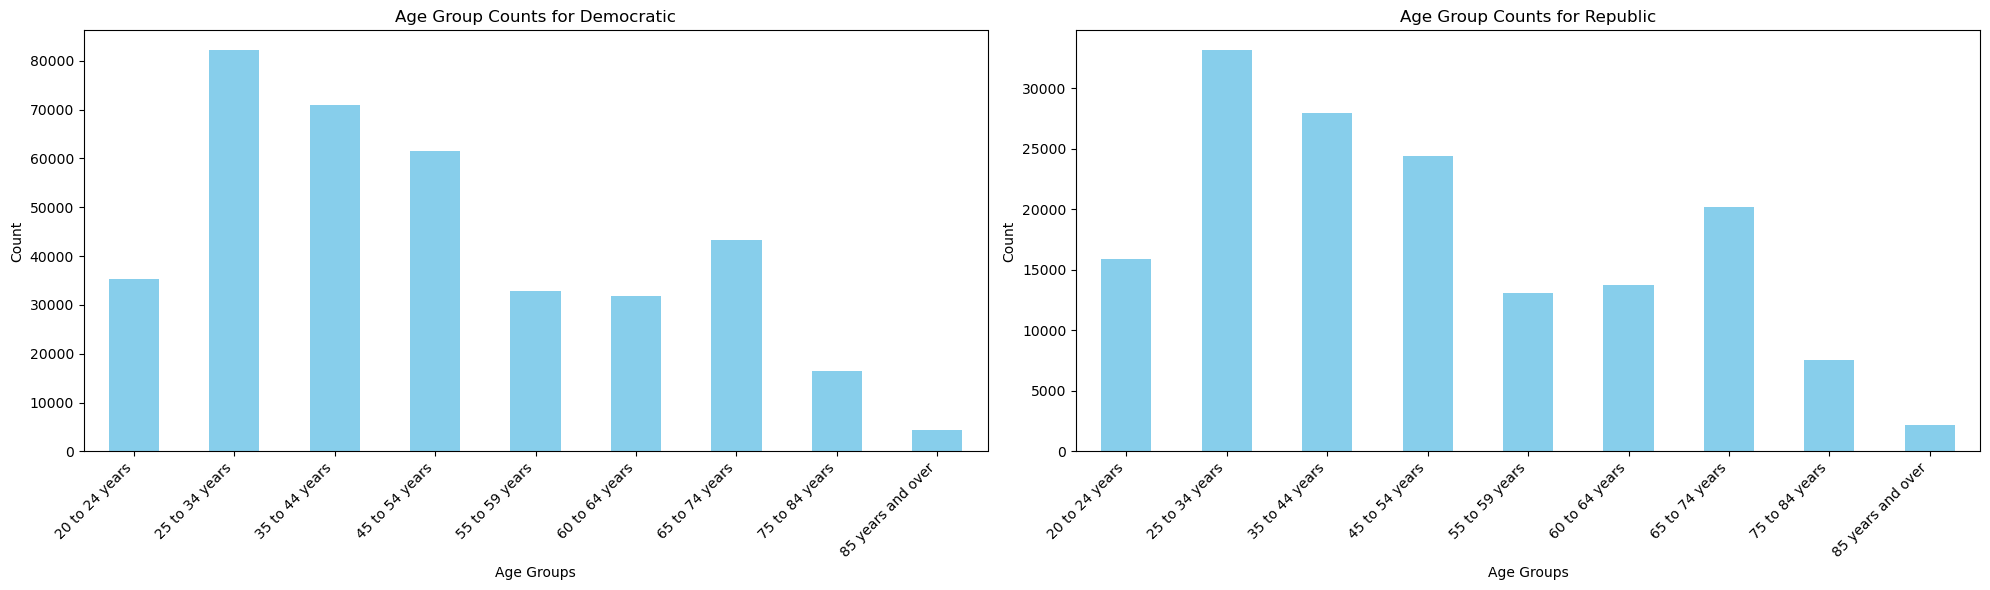

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

parties = ['Democratic', 'Republic']

# Determine the dominant party for each row
df['DominantParty'] = df[parties].idxmax(axis=1)

# Prepare data for plotting
plot_data = df.groupby('DominantParty')[age_columns].sum()

# Create separate bar plots for each dominant party
fig, axes = plt.subplots(1, len(parties), figsize=(20, 6), sharey=False)

for ax, party in zip(axes, parties):
    if party in plot_data.index:
        plot_data.loc[party].plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'Age Group Counts for {party}')
        ax.set_xlabel('Age Groups')
        ax.set_ylabel('Count')
        ax.set_xticklabels(plot_data.loc[party].index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [24]:
df.columns

Index(['County', 'Democratic', 'Liberation', 'Republic', 'Male', 'Female',
       '15 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years',
       '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years',
       '75 to 84 years', '85 years and over', 'Cherokee tribal grouping',
       'Chippewa tribal grouping', 'Navajo tribal grouping',
       'Sioux tribal grouping', 'Asian Indian', 'Chinese', 'Filipino',
       'Japanese', 'Korean', 'Vietnamese', 'Other Asian',
       'Native Hawaiian and Other Pacific Islander', 'Chamorro',
       'Native Hawaiian', 'Samoan',
       'Other Native Hawaiian and Other Pacific Islander', 'Some Other Race',
       'White and Black or African American',
       'White and American Indian and Alaska Native', 'White and Asian',
       'White and Some Other Race',
       'Black or African American and American Indian and Alaska Native',
       'Black or African American and Some Other Race', 'Mexican',
       'Puerto Rican', 'Cuba

## RACE VS PARTY WON

16 48


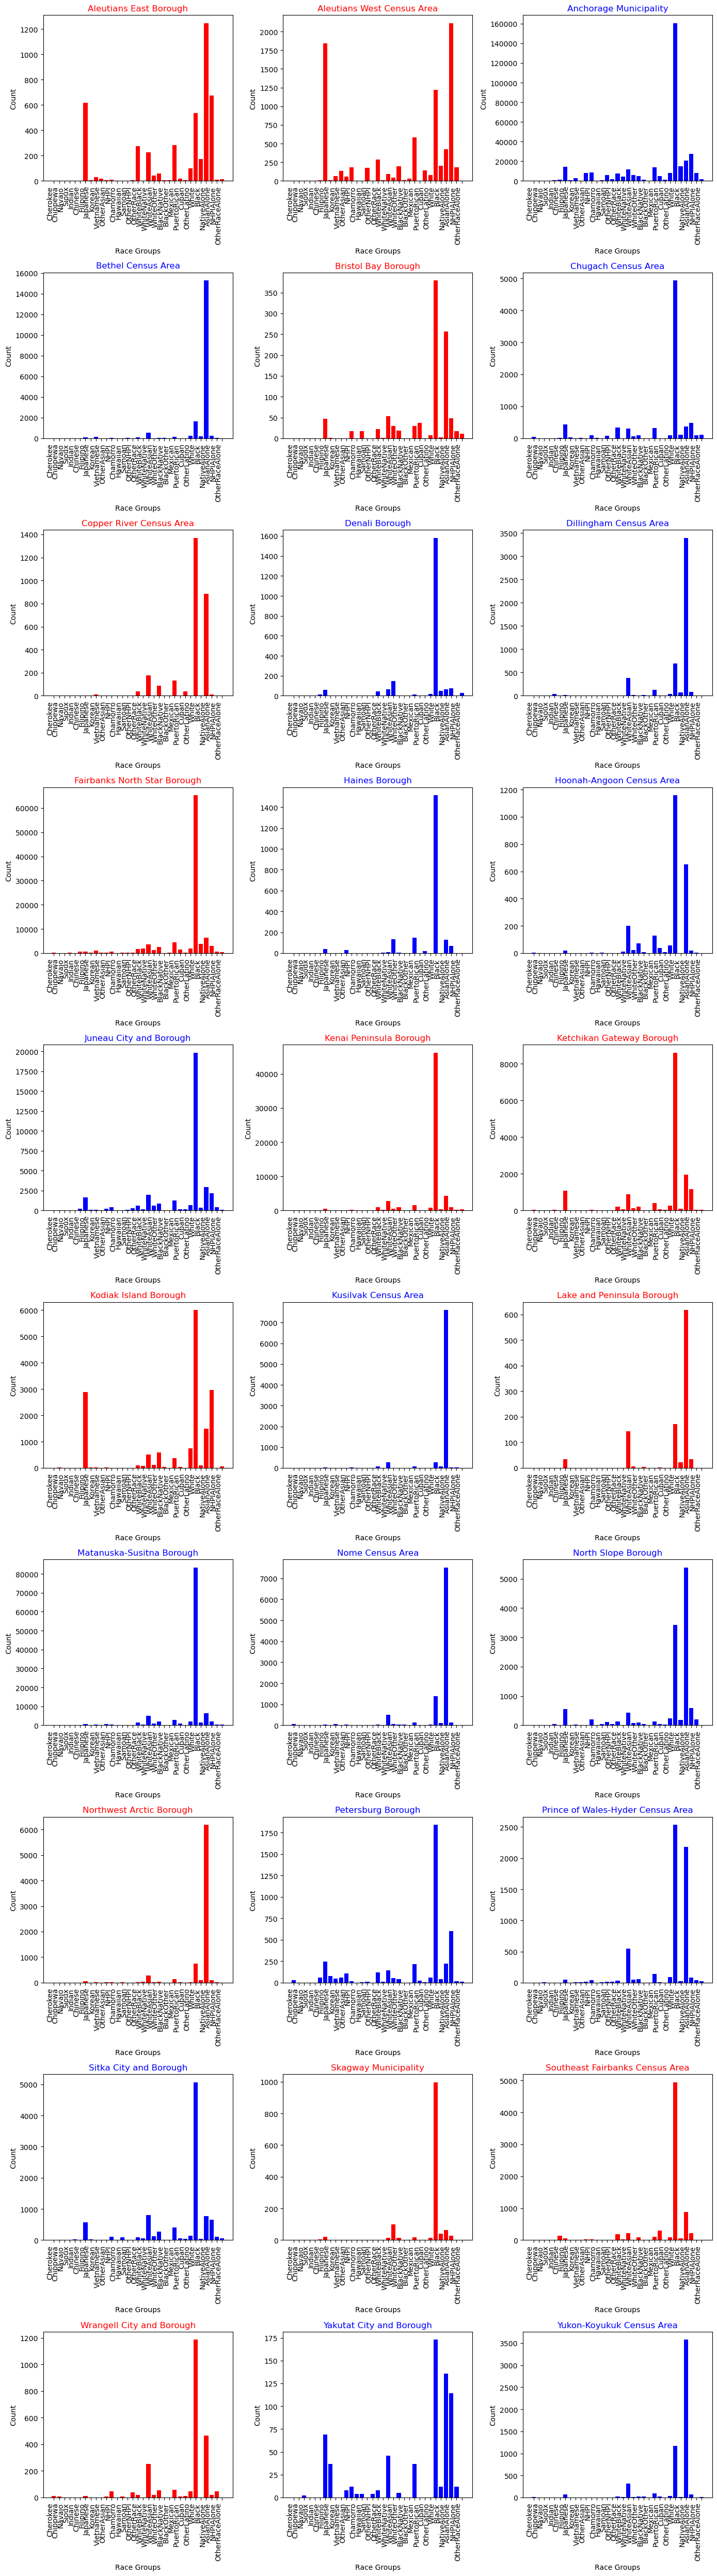

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Update columns with new code words
df.rename(columns={
    'Cherokee tribal grouping': 'Cherokee',
    'Chippewa tribal grouping': 'Chippewa',
    'Navajo tribal grouping': 'Navajo',
    'Sioux tribal grouping': 'Sioux',
    'Asian Indian': 'Indian',
    'Chinese': 'Chinese',
    'Filipino': 'Filipino',
    'Japanese': 'Japanese',
    'Korean': 'Korean',
    'Vietnamese': 'Vietnamese',
    'Other Asian': 'OtherAsian',
    'Native Hawaiian and Other Pacific Islander': 'NHPI',
    'Chamorro': 'Chamorro',
    'Native Hawaiian': 'Hawaiian',
    'Samoan': 'Samoan',
    'Other Native Hawaiian and Other Pacific Islander': 'OtherNHPI',
    'Some Other Race': 'OtherRace',
    'White and Black or African American': 'WhiteBlack',
    'White and American Indian and Alaska Native': 'WhiteNative',
    'White and Asian': 'WhiteAsian',
    'White and Some Other Race': 'WhiteOther',
    'Black or African American and American Indian and Alaska Native': 'BlackNative',
    'Black or African American and Some Other Race': 'BlackOther',
    'Mexican': 'Mexican',
    'Puerto Rican': 'PuertoRican',
    'Cuban': 'Cuban',
    'Other Hispanic or Latino': 'OtherLatino',
    'White alone': 'White',
    'Black or African American alone': 'Black',
    'American Indian and Alaska Native alone': 'NativeAlone',
    'Asian alone': 'AsianAlone',
    'Native Hawaiian and Other Pacific Islander alone': 'NHPIAlone',
    'Some Other Race alone': 'OtherRaceAlone'
}, inplace=True)

columns1 = list(df.columns)
starting_race_index = columns1.index('Cherokee')
ending_race_index = columns1.index('OtherRaceAlone')
print(starting_race_index, ending_race_index)

# Get the dominant party for each borough
dominant_party = list(df[['Democratic', 'Liberation', 'Republic']].idxmax(axis=1))

# Define party colors
party_colors = {
    'Democratic': 'blue',
    'Liberation': 'green',
    'Republic': 'red'
}

# Plot bar graphs in a grid
race_columns = df.iloc[:, starting_race_index:ending_race_index + 1].columns
num_boroughs = len(df)
cols = 3  # Number of columns in the grid
rows = 10  # Compute rows needed

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 5))
axes = axes.flatten()  # Flatten axes array for easy indexing

for i, row in df.iterrows():
    borough = row['County']
    race_counts = row[starting_race_index:ending_race_index + 1]
    dominant_party1 = dominant_party[i]
    color_party = party_colors[dominant_party1]

    # Plot on the corresponding subplot
    ax = axes[i]
    ax.bar(race_columns, race_counts, color=color_party)
    ax.set_xticklabels(race_columns, rotation=90, ha='right')
    ax.set_title(f'{borough}', color=color_party, fontsize=12)
    ax.set_xlabel('Race Groups')
    ax.set_ylabel('Count')

# Remove unused subplots if boroughs don't fill the grid
for j in range(num_boroughs, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


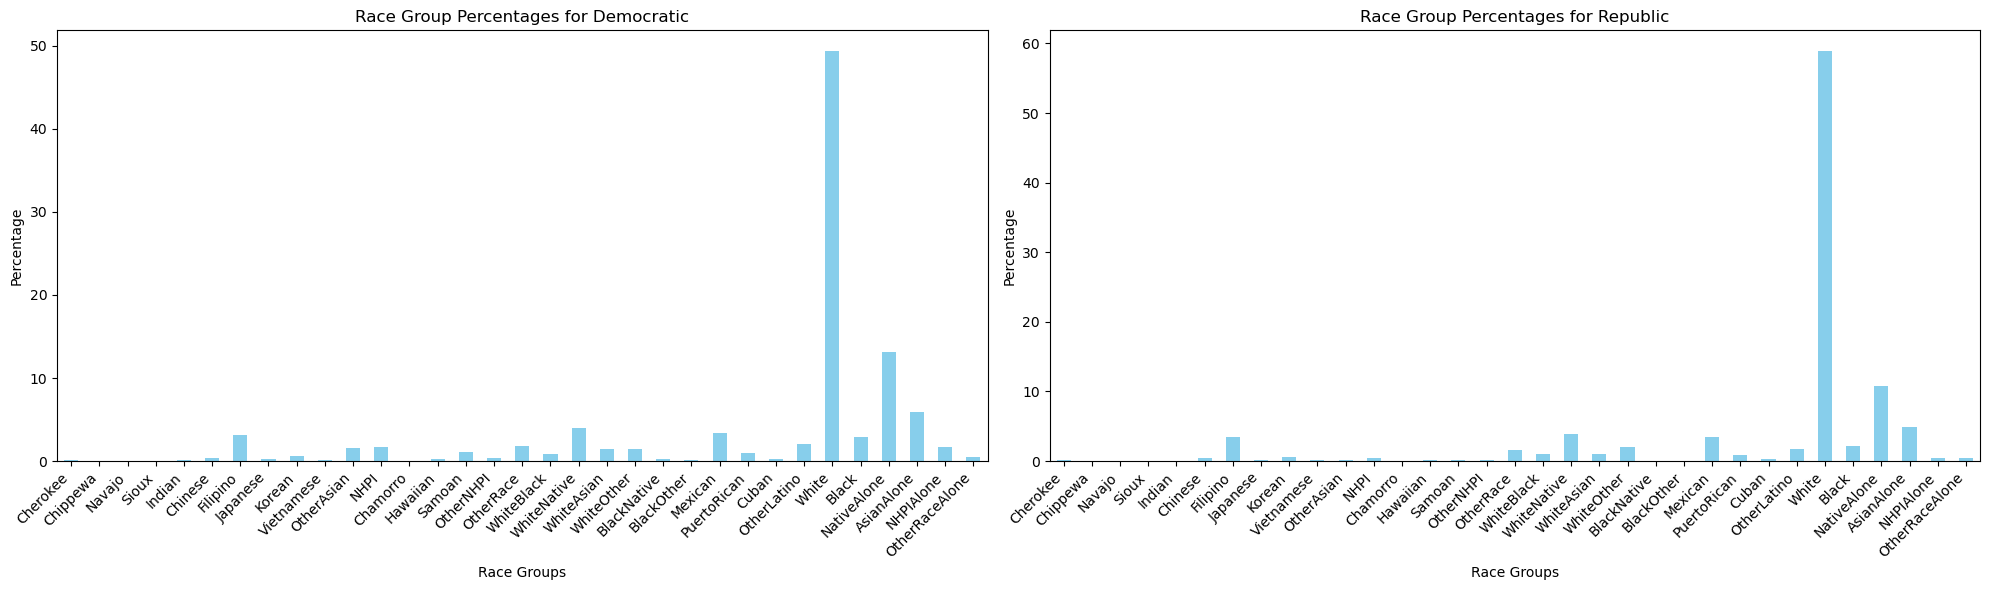

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

parties = ['Democratic', 'Republic']

# Determine the dominant party for each row
df['DominantParty'] = df[parties].idxmax(axis=1)

# Prepare data for plotting
race_columns = df.iloc[:, starting_race_index:ending_race_index + 1].columns
plot_data = df.groupby('DominantParty')[race_columns].sum()

# Convert counts to percentages
plot_data = plot_data.div(plot_data.sum(axis=1), axis=0) * 100

# Create separate bar plots for each dominant party
fig, axes = plt.subplots(1, len(parties), figsize=(20, 6), sharey=False)

for ax, party in zip(axes, parties):
    if party in plot_data.index:
        plot_data.loc[party].plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'Race Group Percentages for {party}')
        ax.set_xlabel('Race Groups')
        ax.set_ylabel('Percentage')
        ax.set_xticklabels(plot_data.loc[party].index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


## OCCUPATION VS PARTY WON

In [27]:

data=pd.read_csv('cleaned osna csv files/cleaned_acs_occupation_2022.csv')


In [28]:
data.head()

,County,Democratic,Liberation,Republic,In labor force,Unemployed,Armed Forces,Not in labor force,Unemployment Rate,"Management, business, science, and arts occupations",...,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 or more"
0,Aleutians East Borough,76,12,243,78.90%,3.50%,0.10%,21.10%,4.40%,21.90%,...,4.00%,2.10%,10.60%,6.00%,8.60%,14.00%,14.90%,24.50%,12.20%,3.10%
1,Aleutians West Census Area,254,11,287,84.00%,2.50%,0.70%,16.00%,3.00%,16.10%,...,1.20%,1.00%,2.80%,3.90%,6.10%,11.90%,22.60%,27.20%,10.40%,12.80%
2,Anchorage Municipality,49028,1152,35241,69.90%,3.40%,4.20%,30.10%,5.20%,41.70%,...,3.30%,1.90%,4.90%,5.10%,8.30%,14.60%,14.20%,20.50%,12.90%,14.40%
3,Bethel Census Area,3074,29,573,62.10%,10.00%,0.30%,37.90%,16.20%,31.40%,...,7.50%,4.40%,8.90%,9.00%,10.90%,17.00%,10.80%,14.20%,9.90%,7.40%
4,Bristol Bay Borough,145,4,149,63.60%,1.70%,1.80%,36.40%,2.70%,35.50%,...,0.70%,1.40%,5.30%,7.70%,8.50%,19.00%,10.90%,21.50%,11.60%,13.40%


In [29]:
##changing those percentages to decimals and floats
columns_to_convert=list(data.columns[4:])
#print(columns_to_convert)
for col in columns_to_convert:
    data[col] = data[col].str.rstrip('%').astype(float) / 100



In [30]:
data.columns

Index(['County', 'Democratic', 'Liberation', 'Republic', 'In labor force',
       'Unemployed', 'Armed Forces', 'Not in labor force', 'Unemployment Rate',
       'Management, business, science, and arts occupations',
       'Service occupations', 'Sales and office occupations',
       'Natural resources, construction, and maintenance occupations',
       'Production, transportation, and material moving occupations',
       'Agriculture, forestry, fishing and hunting, and mining',
       'Construction', 'Manufacturing', 'Retail trade',
       'Transportation and warehousing, and utilities',
       'Finance and insurance, and real estate and rental and leasing',
       'Professional, scientific, and management, and administrative and waste management services',
       'Educational services, and health care and social assistance',
       'Arts, entertainment, and recreation, and accommodation and food services',
       'Other services, except public administration', 'Public administration

In [31]:
# Create a mapping of long column names to shorter aliases
column_mapping = {
    'Agriculture, forestry, fishing and hunting, and mining': 'Agriculture',
    'Construction': 'Construction',
    'Manufacturing': 'Manufacturing',
    'Retail trade': 'Retail',
    'Transportation and warehousing, and utilities': 'Transport',
    'Finance and insurance, and real estate and rental and leasing': 'Finance',
    'Professional, scientific, and management, and administrative and waste management services': 'Professional',
    'Educational services, and health care and social assistance': 'Education',
    'Arts, entertainment, and recreation, and accommodation and food services': 'Arts',
    'Other services, except public administration': 'OtherServices',
    'Public administration': 'PublicAdmin',
    'Management, business, science, and arts occupations': 'MgmtArts',
    'Service occupations': 'Service',
    'Sales and office occupations': 'SalesOffice',
    'Natural resources, construction, and maintenance occupations': 'NatResources',
    'Production, transportation, and material moving occupations': 'Production'
}

# Rename the columns in the DataFrame
data.rename(columns=column_mapping, inplace=True)


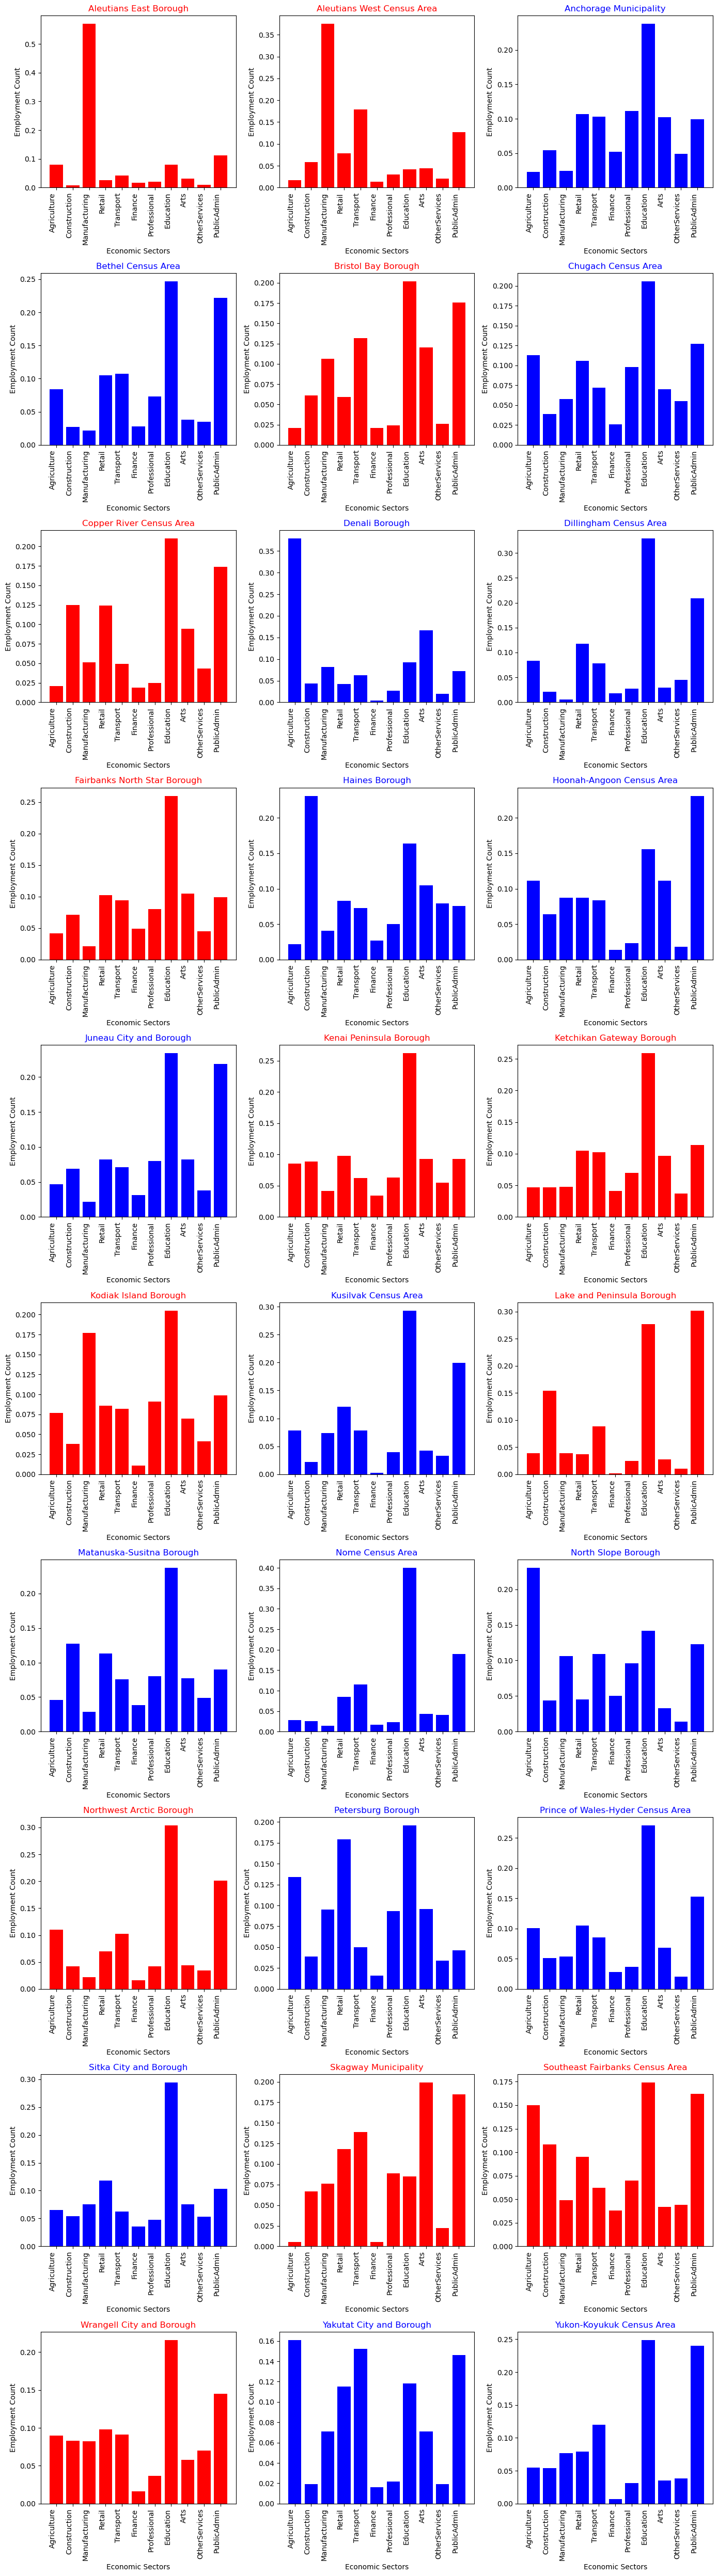

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume `data` is your DataFrame
# Columns related to economic sectors
columns1=list(data.columns)
starting_sector_index=columns1.index('Agriculture')
ending_sector_index=columns1.index('PublicAdmin')
sector_columns=columns1[starting_sector_index:ending_sector_index+1]

# Ensure the columns exist in the DataFrame
assert all(col in data.columns for col in columns1[starting_sector_index:ending_sector_index+1]), "Some sector columns are missing!"



# Reuse the dominant party information
dominant_party = list(data[['Democratic', 'Liberation', 'Republic']].idxmax(axis=1))

# Party colors dictionary
party_colors = {
    'Democratic': 'blue',
    'Liberation': 'green',
    'Republic': 'red'
}

# Number of boroughs
num_boroughs = len(data)

# Define grid dimensions
cols = 3
rows = (num_boroughs + cols - 1) // cols  # Compute rows dynamically
fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 5))
axes = axes.flatten()

# Iterate over the DataFrame rows to plot data
for i, row in data.iterrows():
    borough = row['County']
    sector_counts = row[starting_sector_index:ending_sector_index + 1]
    dominant_party1 = dominant_party[i]
    color_party = party_colors[dominant_party1]
    
    # Plot on the corresponding subplot
    ax = axes[i]
    ax.bar(sector_columns, sector_counts, color=color_party)
    ax.set_xticklabels(sector_columns, rotation=90, ha='right')
    ax.set_title(f'{borough}', color=color_party, fontsize=12)
    ax.set_xlabel('Economic Sectors')
    ax.set_ylabel('Employment Count')

# Remove unused subplots if boroughs don't fill the grid
for j in range(num_boroughs, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [33]:
# Create a mapping of long column names to shorter aliases
column_mapping = {
    'Agriculture, forestry, fishing and hunting, and mining': 'Agriculture',
    'Construction': 'Construction',
    'Manufacturing': 'Manufacturing',
    'Retail trade': 'Retail',
    'Transportation and warehousing, and utilities': 'Transport',
    'Finance and insurance, and real estate and rental and leasing': 'Finance',
    'Professional, scientific, and management, and administrative and waste management services': 'Professional',
    'Educational services, and health care and social assistance': 'Education',
    'Arts, entertainment, and recreation, and accommodation and food services': 'Arts',
    'Other services, except public administration': 'OtherServices',
    'Public administration': 'PublicAdmin',
    'Management, business, science, and arts occupations': 'MgmtArts',
    'Service occupations': 'Service',
    'Sales and office occupations': 'SalesOffice',
    'Natural resources, construction, and maintenance occupations': 'NatResources',
    'Production, transportation, and material moving occupations': 'Production'
}

# Rename the columns in the DataFrame
df.rename(columns=column_mapping, inplace=True)

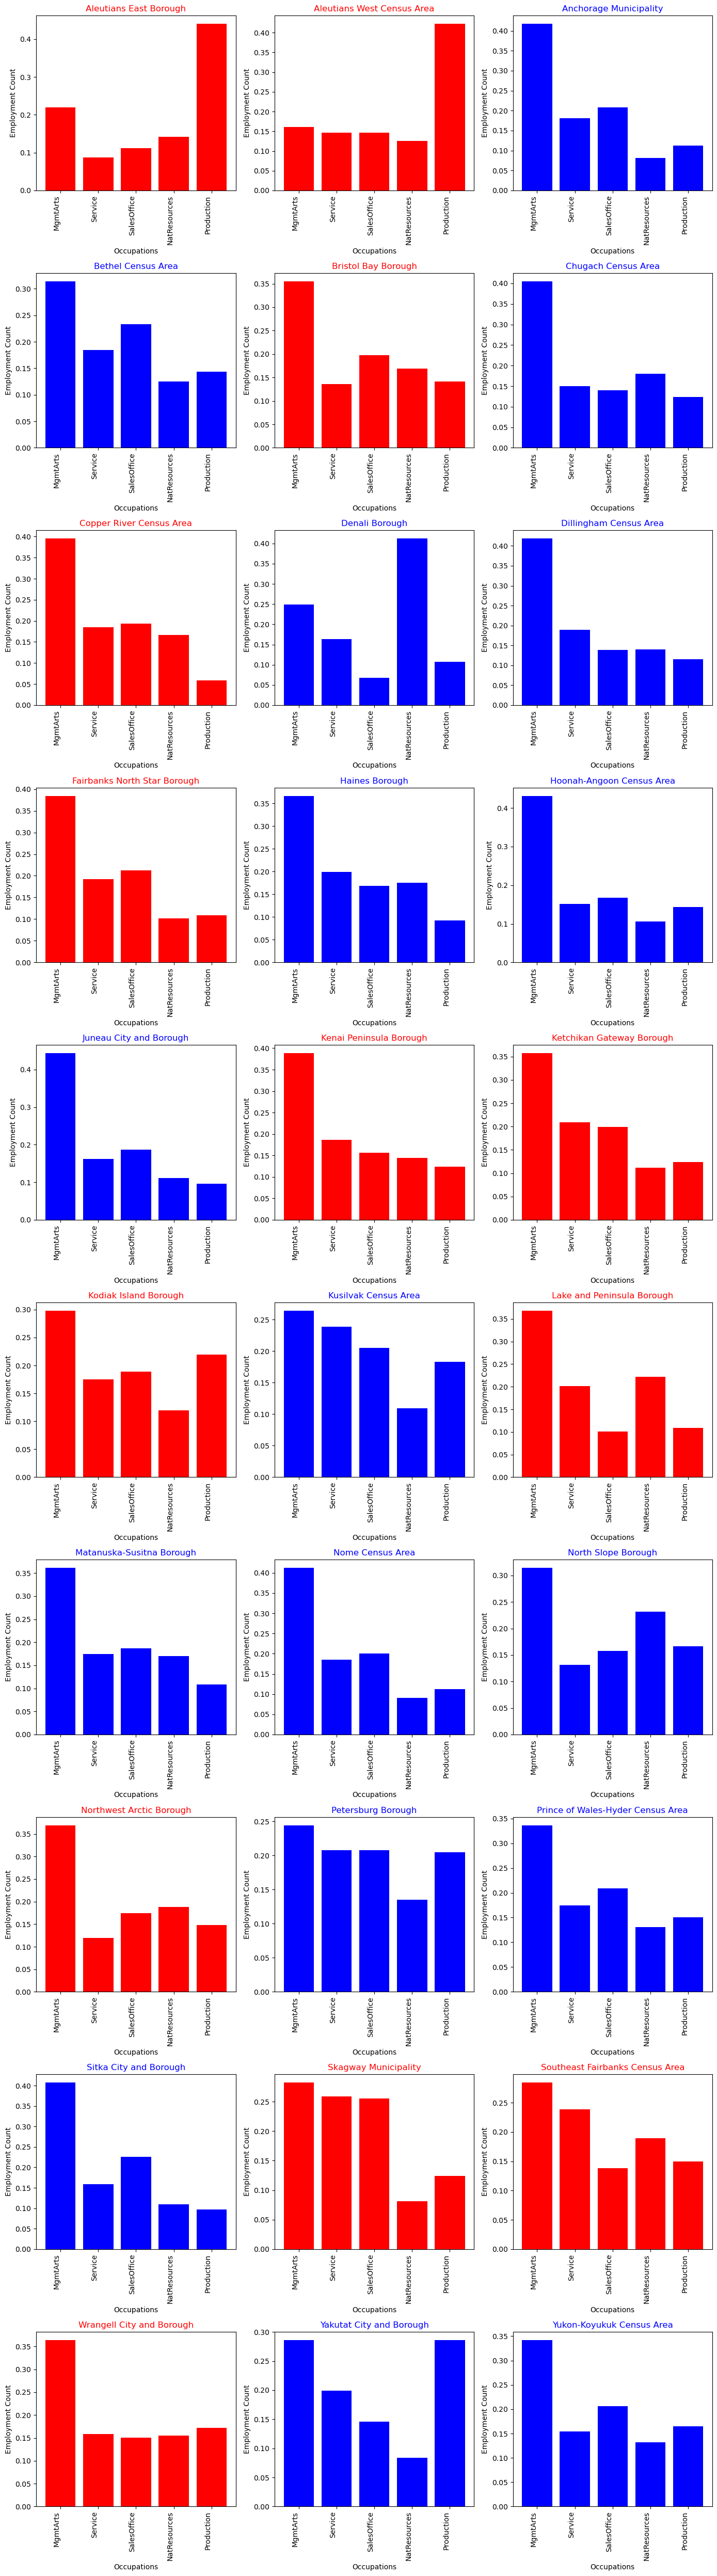

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume `data` is your DataFrame
# Columns related to economic sectors
columns1=list(data.columns)
starting_sector_index=columns1.index('MgmtArts')
ending_sector_index=columns1.index('Production')
sector_columns=columns1[starting_sector_index:ending_sector_index+1]

# Ensure the columns exist in the DataFrame
assert all(col in data.columns for col in columns1[starting_sector_index:ending_sector_index+1]), "Some sector columns are missing!"



# Reuse the dominant party information
dominant_party = list(data[['Democratic', 'Liberation', 'Republic']].idxmax(axis=1))

# Party colors dictionary
party_colors = {
    'Democratic': 'blue',
    'Liberation': 'green',
    'Republic': 'red'
}

# Number of boroughs
num_boroughs = len(data)

# Define grid dimensions
cols = 3
rows = (num_boroughs + cols - 1) // cols  # Compute rows dynamically
fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 5))
axes = axes.flatten()

# Iterate over the DataFrame rows to plot data
for i, row in data.iterrows():
    borough = row['County']
    sector_counts = row[starting_sector_index:ending_sector_index + 1]
    dominant_party1 = dominant_party[i]
    color_party = party_colors[dominant_party1]
    
    # Plot on the corresponding subplot
    ax = axes[i]
    ax.bar(sector_columns, sector_counts, color=color_party)
    ax.set_xticklabels(sector_columns, rotation=90, ha='right')
    ax.set_title(f'{borough}', color=color_party, fontsize=12)
    ax.set_xlabel('Occupations')
    ax.set_ylabel('Employment Count')

# Remove unused subplots if boroughs don't fill the grid
for j in range(num_boroughs, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
